# Traitement des resultats / _Processing results_
## Opportunite GP (YvBfAdHB)

- Regroupez vos questions par groupes pour un traitement simplifie des resultats
- _Use groups to categorize your fields. It will make processing easier_


In [1]:
import mbr_typeform as mbr

tfs = mbr.tf_struct(formid='YvBfAdHB')

struct_d = tfs.get_form_structure()
form_title = tfs.get_title()
form_questions = tfs.get_fields()
form_responses = tfs.get_form_responses()
nb_responses = tfs.get_nb_responses()
form_groups = tfs.get_groups()

Group 1 : Apprenons à  se connaître
Group 2 : Votre rapport au numérique...
Group 3 : Enseignement et éducation...
Group 4 : L'offre culturelle numérique
Group 5 : Les sujets qui vous interessent
Group 6 : Pour conclure


-------------------------------------------------------------------------

# GROUP 1 : Apprenons à  se connaître // Group idex 0

-------------------------------------------------------------------------

# Sexes, hmmm... (id : oYqnhtesJuF5) - Single Choice

In [2]:
import matplotlib.pyplot as plt

# Le premier group a pour index 0
gidx = 0

# Get labels and results
qsex_title, sexname, sex_dtf = tfs.get_results(gidx=gidx,qid='oYqnhtesJuF5')

# Rappel des options :
print("Rappel des sexes possibles :\n ",sexname)

# dico_du_sex = un dataframe associe par sexe
dico_du_sex = {sexname[i]: sex_dtf[i] for i in range(len(sexname))}

Rappel des sexes possibles :
  ['Non genré', 'Fluide', 'Un homme', 'Une femme']


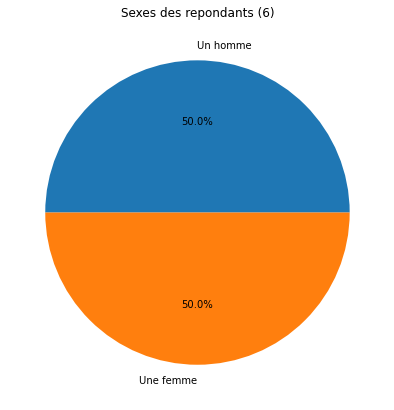

In [3]:
import matplotlib.pyplot as plt

# Clean them for nicer plot (no need of 0 results)
cln_opt, cln_res = mbr.clean_lists_for_cheesepie(labels=sexname, values=sex_dtf)
  
# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_res, labels = cln_opt, autopct='%1.1f%%')
plt.title('Sexes des repondants ('+ str(nb_responses) +')')
# Ajouter legende : nombre repondants
# Ajouter pourcentage sur les parts
plt.show()

# Tranche d'age ( id = BZsILkKYGzKQ ) - Single choice

In [4]:
# Get labels and results
qage_label, agelable, age_dtf = tfs.get_results(gidx=gidx,qid='BZsILkKYGzKQ')

# Rappel des options :
print("Rappel des ages possibles :\n ",agelable)

# dico_des_ages = un dataframe associe par sexe
dico_des_ages = {agelable[i]: age_dtf[i] for i in range(len(sexname))}

Rappel des ages possibles :
  ['Moins de 18 ans', 'Entre 18 et 25 ans', 'Entre 26 et 35 ans', 'Entre 36 et 50 ans', 'Entre 51 et 75 ans', '76 ans et plus']


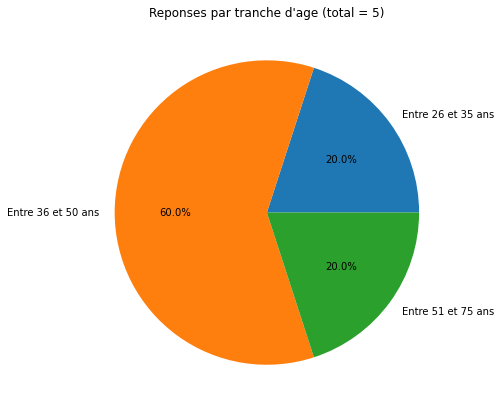

In [5]:
import matplotlib.pyplot as plt

# Clean them for nicer plot (no need of 0 results)
cln_age, cln_dtf = mbr.clean_lists_for_cheesepie(labels=agelable, values=age_dtf)

nb_valid_resp = 0
for i in range(len(age_dtf)) :
    nb_valid_resp += age_dtf[i].shape[0]

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_dtf, labels = cln_age, autopct='%1.1f%%')
plt.title("Reponses par tranche d'age (total = "+str(nb_valid_resp)+")")
# Ajouter legende : nombre repondants
# Ajouter pourcentage sur les parts
plt.show()

### Tranche d'age par sexe

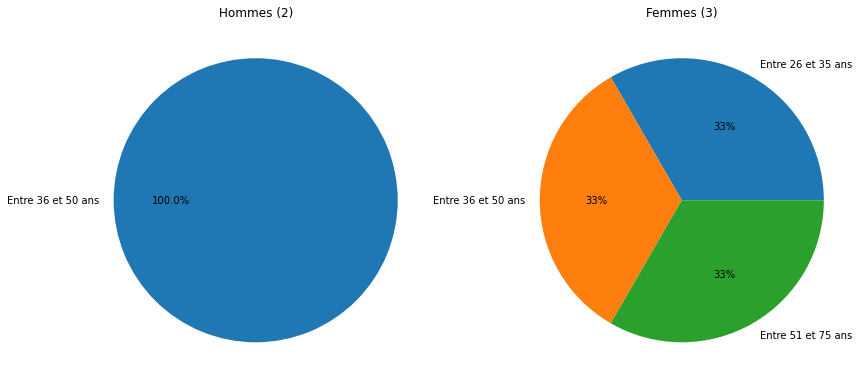

In [6]:
from pylab import *

df_men_res = dico_du_sex['Un homme']
df_women_res = dico_du_sex['Une femme']


labels_m, dtf_res_m = mbr.df_singlecolumn_subresults(main_dtf=df_men_res, l_options=cln_age, q_name=qage_label)
cln_age_m, cln_dtf_m = mbr.clean_lists_for_cheesepie(labels=labels_m, values=dtf_res_m)

nb_valid_resp_m = 0
for i in range(len(dtf_res_m)) :
    nb_valid_resp_m += dtf_res_m[i].shape[0]

labels_w, dtf_res_w = mbr.df_singlecolumn_subresults(main_dtf=df_women_res, l_options=cln_age, q_name=qage_label)
cln_age_w, cln_dtf_w = mbr.clean_lists_for_cheesepie(labels=labels_w, values=dtf_res_w)

nb_valid_resp_w = 0
for i in range(len(dtf_res_w)) :
    nb_valid_resp_w += dtf_res_w[i].shape[0]

# Make figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

# A standard pie plot
axs[0].pie(cln_dtf_m, labels=cln_age_m, autopct='%1.1f%%')
axs[0].title.set_text('Hommes (' + str(nb_valid_resp_m) + ')')

# Shift the second slice using explode
axs[1].pie(cln_dtf_w, labels=cln_age_w, autopct='%.0f%%')
axs[1].title.set_text('Femmes (' + str(nb_valid_resp_w) + ')')

plt.show()

# Vivez-vous en France ? (id = M2yM4x72oiV3) Single Choice

In [7]:
# Get labels and results
qFrance, labels, france_yn_dtf = tfs.get_results(gidx=gidx,qid='M2yM4x72oiV3')

# Rappel des options :
print("Rappel des possibilites pour 'Habitez-vous en France ?' :\n ",labels)


Rappel des possibilites pour 'Habitez-vous en France ?' :
  ['oui', 'non']


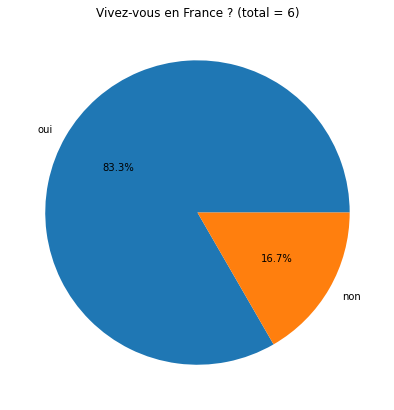

In [8]:

cln_France_lb, cln_dtf_France = mbr.clean_lists_for_cheesepie(labels=labels, values=france_yn_dtf)

# dico_de_france = un dataframe par France / NonFrance
dico_de_france = {labels[i]: france_yn_dtf[i] for i in range(len(labels))}

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_dtf_France, labels = cln_France_lb, autopct='%1.1f%%')
plt.title(qFrance + " (total = "+str(nb_responses)+")")
plt.show()

# Dernier diplome ? (id = 8WoLUtHsWKKJ) Single Choice

In [9]:
# Get labels and results
qdiplome, dpl_labels, diplome_dtfs = tfs.get_results(gidx=gidx,qid='8WoLUtHsWKKJ')

# Rappel des options :
print("Rappel des diplomes possibles :\n ",dpl_labels)

Rappel des diplomes possibles :
  ['Formation professionnel', 'Bac +2', 'Licence', "Master / Diplôme d'ingénieur", 'Doctorat']


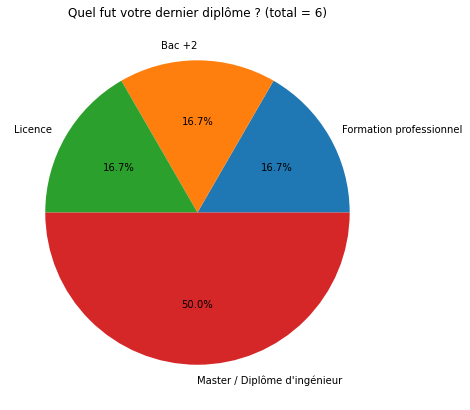

In [10]:
cln_dpl_labels, cln_diplome_dtfs = mbr.clean_lists_for_cheesepie(labels=dpl_labels, values=diplome_dtfs)

# dico_de_diplome = un dataframe par diplome
dico_de_diplome = {dpl_labels[i]: diplome_dtfs[i] for i in range(len(labels))}

nb_valid_resp = 0
for i in range(len(diplome_dtfs)) :
    nb_valid_resp += diplome_dtfs[i].shape[0]

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_diplome_dtfs, labels = cln_dpl_labels, autopct='%1.1f%%')
plt.title(qdiplome + " (total = "+str(nb_valid_resp)+")")
# Ajouter legende : nombre repondants
# Ajouter pourcentage sur les parts
plt.show()

# Secteur public ? (id = vMmUInJ5B4C9) Single Choice


In [11]:
# Get labels and results
qPublic, labels, public_yn_dtf = tfs.get_results(gidx=gidx,qid='vMmUInJ5B4C9')

# Rappel des options :
print("Rappel des possibilite pour le secteur public :\n ",labels)


Rappel des possibilite pour le secteur public :
  ['oui', 'non']


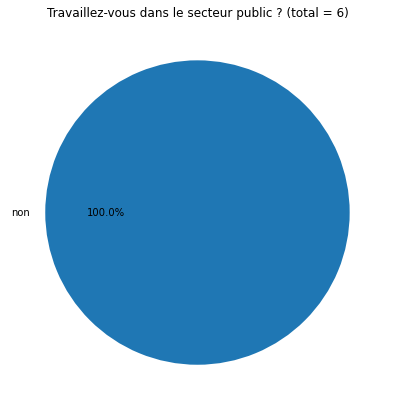

In [12]:

cln_public_lb, cln_dtf_public = mbr.clean_lists_for_cheesepie(labels=labels, values=public_yn_dtf)

# dico_de_secteur_public = un dataframe par diplome
dico_de_secteur_public = {labels[i]: public_yn_dtf[i] for i in range(len(labels))}

nb_valid_resp = 0
for i in range(len(public_yn_dtf)) :
    nb_valid_resp += public_yn_dtf[i].shape[0]


# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_dtf_public, labels = cln_public_lb, autopct='%1.1f%%')
plt.title(qPublic + " (total = "+str(nb_valid_resp)+")")
# Ajouter legende : nombre repondants
# Ajouter pourcentage sur les parts
plt.show()

## Si secteur public, Secteur culturel ? ( id = 4dOyMP97omhJ ) Single choice

In [13]:
# Get labels and results
qCulture, labels, culture_yn_dtf = tfs.get_results(gidx=gidx,qid='4dOyMP97omhJ')

# Rappel des options :
print("Rappel des possibilite pour le secteur culturel :\n ",labels)

Rappel des possibilite pour le secteur culturel :
  ['oui', 'non']


In [14]:
cln_culture_lb, cln_dtf_culture = mbr.clean_lists_for_cheesepie(labels=labels, values=culture_yn_dtf)

# dico_de_secteur_culturel = un dataframe par diplome
dico_de_secteur_culturel = {labels[i]: culture_yn_dtf[i] for i in range(len(labels))}

if len(cln_culture_lb) > 0 :
    # show plot
    fig = plt.figure(figsize =(10, 7))
    plt.pie(cln_dtf_culture, labels = cln_culture_lb, autopct='%1.1f%%')
    plt.title(qCulture + " (total = "+str(nb_responses)+")")
    plt.show()
else :
    print('No result')

No result


## Specialites / domaine de competence ( id = OnnjlaZauNJ0 ) Single choice

In [15]:
# Get labels and results
qScpecialite, spec_lbls, spec_dtfs = tfs.get_results(gidx=0,qid='OnnjlaZauNJ0')

# Rappel des options :
print("Rappel des specialites possibles :\n ",spec_lbls)

POOOOO
Rappel des specialites possibles :
  ["Services d'informations", 'Budget / Finance / Compta', 'Juridique / Droits', 'Bâtiment / Sécurité physique', 'Développement commercial', 'Communication / Partenariats / Evénementiel', 'Ressources humaines / Santé / Social', 'Restauration / Tourisme', 'Other']


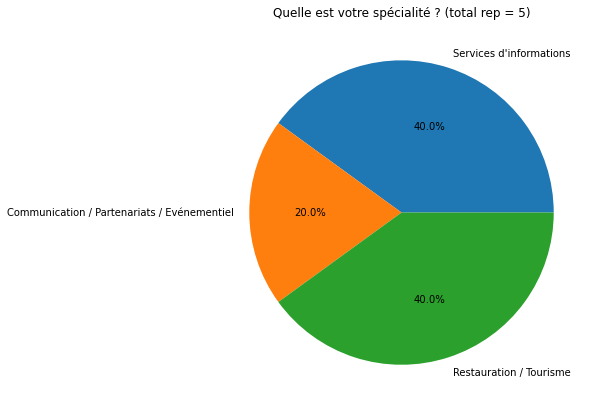

In [16]:
cln_spec_lb, cln_dtf_spec = mbr.clean_lists_for_cheesepie(labels=spec_lbls, values=spec_dtfs)

# dico_de_specialite
dico_de_specialite = {spec_lbls[i]: spec_dtfs[i] for i in range(len(spec_lbls))}

nb_valid_resp = 0

for i in range(len(spec_dtfs)) :
    nb_valid_resp += spec_dtfs[i].shape[0]

if len(cln_spec_lb) > 0 :
    # show plot
    fig = plt.figure(figsize =(10, 7))
    plt.pie(cln_dtf_spec, labels = cln_spec_lb, autopct='%1.1f%%')
    plt.title(qScpecialite + " (total rep = "+str(nb_valid_resp)+")")
    plt.show()
else :
    print('No result')

----------------------------------------------------

#  GROUP 2 - Votre rapport au numérique // Group index = 1

--------------------------------------------------

In [17]:
gidx = 1

## Quand utilisez-vous l'IT ? ( id =  EyykV9VMHRBS ) Single choice

In [18]:
# Get labels and results
qtimetoIT, it_time_lbls, it_time_dtf = tfs.get_results(gidx=1,qid='EyykV9VMHRBS')

# Rappel des options :
print("Rappel des temps d'informatique possibles :\n ",it_time_lbls)

Rappel des temps d'informatique possibles :
  ['Dans la vie privée', 'Dans la vie professionnelle', 'Tout le temps', 'Le moins possible']


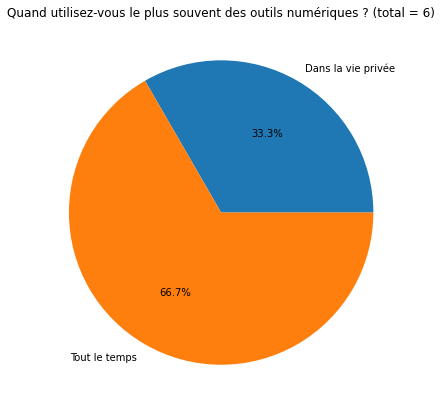

In [19]:
# dico_des_ages = un dataframe associe par sexe
dico_des_ITtime = {it_time_lbls[i]: it_time_dtf[i] for i in range(len(it_time_lbls))}


cln_itt_labels, cln_itt_dtfs = mbr.clean_lists_for_cheesepie(labels=it_time_lbls, values=it_time_dtf)


nb_valid_resp = 0
for i in range(len(it_time_dtf)) :
    nb_valid_resp += it_time_dtf[i].shape[0]

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_itt_dtfs, labels = cln_itt_labels, autopct='%1.1f%%')
plt.title(qtimetoIT + " (total = "+str(nb_valid_resp)+")")
plt.show()

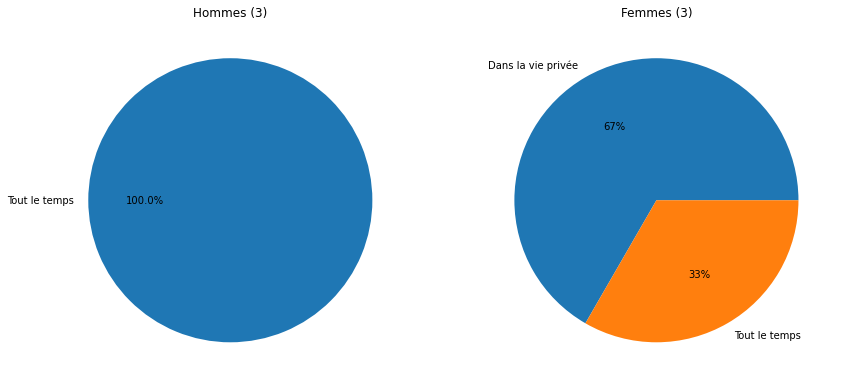

In [20]:
labels_m, dtf_res_m = mbr.df_singlecolumn_subresults(main_dtf=df_men_res, l_options=cln_itt_labels, q_name=qtimetoIT)
cln_age_m, cln_dtf_m = mbr.clean_lists_for_cheesepie(labels=labels_m, values=dtf_res_m)

nb_valid_resp_m = 0
for i in range(len(dtf_res_m)) :
    nb_valid_resp_m += dtf_res_m[i].shape[0]

labels_w, dtf_res_w = mbr.df_singlecolumn_subresults(main_dtf=df_women_res, l_options=cln_itt_labels, q_name=qtimetoIT)
cln_age_w, cln_dtf_w = mbr.clean_lists_for_cheesepie(labels=labels_w, values=dtf_res_w)

nb_valid_resp_w = 0
for i in range(len(dtf_res_w)) :
    nb_valid_resp_w += dtf_res_w[i].shape[0]

# Make figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

# A standard pie plot
axs[0].pie(cln_dtf_m, labels=cln_age_m, autopct='%1.1f%%')
axs[0].title.set_text('Hommes (' + str(nb_valid_resp_m) + ')')

# Shift the second slice using explode
axs[1].pie(cln_dtf_w, labels=cln_age_w, autopct='%.0f%%')
axs[1].title.set_text('Femmes (' + str(nb_valid_resp_w) + ')')

plt.show()

### TODO : Quand les gens font-ils de l'IT (Scpecialite // Time to IT)


------------------------------------------------------------------------------------------------


# Plutot par plaisir ou par necessite / Single choice ( id = r14e6RHnmlxH )

In [21]:
q_id = 'r14e6RHnmlxH'

# Get labels and results
q_Plaisir, it_plaisir_lbls, it_plaisir_dtf = tfs.get_results(gidx=1,qid=q_id)

# Rappel des options :
print("Rappel des temps d'informatiques possibles :\n ",it_plaisir_lbls)


Rappel des temps d'informatiques possibles :
  ['Plaisir', 'Nécessité']


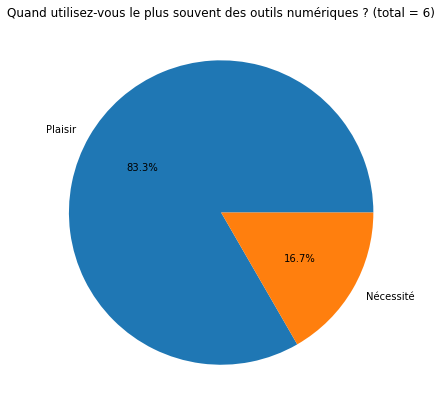

In [22]:
# dico_des_ages = un dataframe associe par sexe
dico_des_plaisirs = {it_plaisir_lbls[i]: it_plaisir_dtf[i] for i in range(len(it_plaisir_lbls))}


cln_plaisir_labels, cln_plaisir_dtfs = mbr.clean_lists_for_cheesepie(labels=it_plaisir_lbls, values=it_plaisir_dtf)

nb_valid_resp = 0
for i in range(len(it_time_dtf)) :
    nb_valid_resp += it_time_dtf[i].shape[0]

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_plaisir_dtfs, labels = cln_plaisir_labels, autopct='%1.1f%%')
plt.title(qtimetoIT + " (total = "+str(nb_valid_resp)+")")
plt.show()

# Quels objets informatiques possedez-vous ? Multiple choice ( id = DeUtJwpfRd1O )

In [23]:
qidq = 'DeUtJwpfRd1O'
# Get labels and results
q_appareils, appareils_lbls, appareils_dtf = tfs.get_results(gidx=1,qid=qidq)

# Rappel des options :
print("Rappel des objets informatiques possibles :\n ",appareils_lbls)

Rappel des objets informatiques possibles :
  ['Smartphone professionnel', 'Smartphone personnel', 'Ordinateur personnel', 'Ordinateur professionnel', 'Des objets connectés (Smart watch, Garmin, etc.)', 'Rien']


In [24]:
cln_appareils_labels, cln_appareils_nb = mbr.clean_lists_multiplechoices_histogramme(labels=appareils_lbls, values=appareils_dtf, nbreps = nb_responses)

df_Rien = tfs.get_question_specific_resp_dtf(gidx=1, qid=qidq, label='Rien')

nb_cyberminimaliste = 0

if df_Rien is not None :
    nb_cyberminimaliste = str(df_Rien.shape[0])
    print ("On a trouve "+nb_cyberminimaliste+ " cyberminimalistes")
else :
    print("Personne n'a coche 'Rien'")

nb_valid_resp = 0
for i in range(len(appareils_dtf)) :
    nb_valid_resp += appareils_dtf[i].shape[0]

nb_valid_resp -= nb_cyberminimaliste

Personne n'a coche 'Rien'


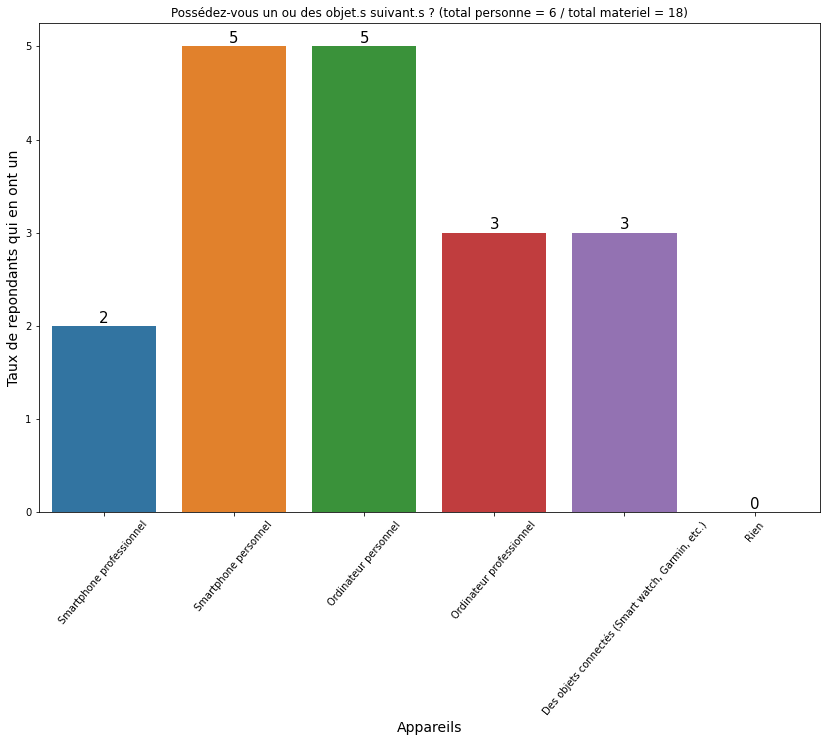

In [25]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns

data = {"Appareil" : cln_appareils_labels, "Taux possession" : cln_appareils_nb}

df = pd.DataFrame(data, columns=['Appareil', 'Taux possession'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Appareil", y="Taux possession", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Appareils", size=14)
  
# Setting the label for y-axis
plt.ylabel("Taux de repondants qui en ont un", size=14)
  
# Setting the title for the graph
plt.title(q_appareils + " (total personne = "+str(nb_responses)+" / total materiel = " + str(nb_valid_resp) + ")")

plt.xticks(rotation=50)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

In [26]:
meanapp = tfs.get_meanNbItem_in_multipleChoice(possiblechoices = cln_appareils_labels, label_expt = 'Rien')

print('Les gens ont en moyenne ' + str(meanapp) +' appareils informatique')

Les gens ont en moyenne 3.0 appareils informatique


# AISANCE PERSONNELLE IT - Opinion Scale (id = bK9T5Pen4AB0 )

Pour les croisements de donnees : https://www.pythonpool.com/matplotlib-heatmap/



In [27]:
qidq = 'bK9T5Pen4AB0'
# Get labels and results
q_aisance, aisance_lbls, op_scale = tfs.get_results(gidx=1,qid=qidq)

# Rappel des options :
print("Taille de l'opinion :\n ",op_scale)

# form_responses = liste de toutes les reponses sous forme de dataframe

Taille de l'opinion :
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


https://plotly.com/python/bubble-charts/



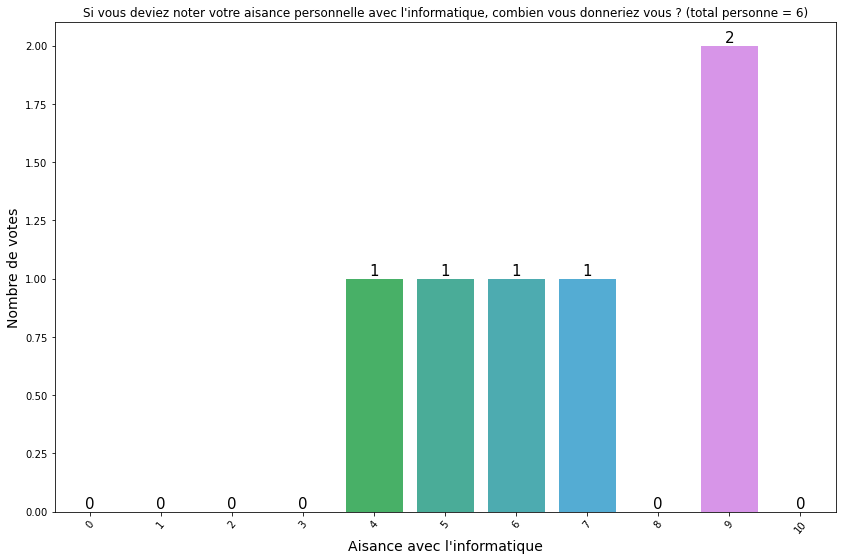

In [28]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns


nb_of_pips = []
moyenne_aisance = 0.0
total_notes = 0

for i in range(len(op_scale)) :
    df = form_responses[form_responses[q_aisance] == op_scale[i]]
    nb_votes = df.shape[0]
    nb_of_pips.append(nb_votes)
    total_notes += nb_votes*op_scale[i]

moyenne_aisance = total_notes / nb_responses

data = {"Note" : op_scale, "Votes" : nb_of_pips}

df = pd.DataFrame(data, columns=['Note', 'Votes'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Note", y="Votes", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Aisance avec l'informatique", size=14)
  
# Setting the label for y-axis
plt.ylabel("Nombre de votes", size=14)
  
# Setting the title for the graph
plt.title(q_aisance + " (total personne = "+str(nb_responses)+')')

plt.xticks(rotation=50)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

In [29]:
print('Moyenne generale : '+str(moyenne_aisance))

Moyenne generale : 6.666666666666667


## TODO : Plotter sur un meme graph mais de couleur differente (une par sexe)
## TODO : Plotter sur un meme graph en fonction de l'age
## TODO : Plotter sur un meme graph en fonction du metier

# Confiance donnees personnelles / ( id = IihvSDBsSpUH ) - Opinion scale

In [30]:
qidq = 'IihvSDBsSpUH'
# Get labels and results
q_confiance, confiance_lbls, op_scale_c = tfs.get_results(gidx=1,qid=qidq)

# Rappel des options :
print("Taille de l'opinion :\n ",op_scale_c)

# form_responses = liste de toutes les reponses sous forme de dataframe

Taille de l'opinion :
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


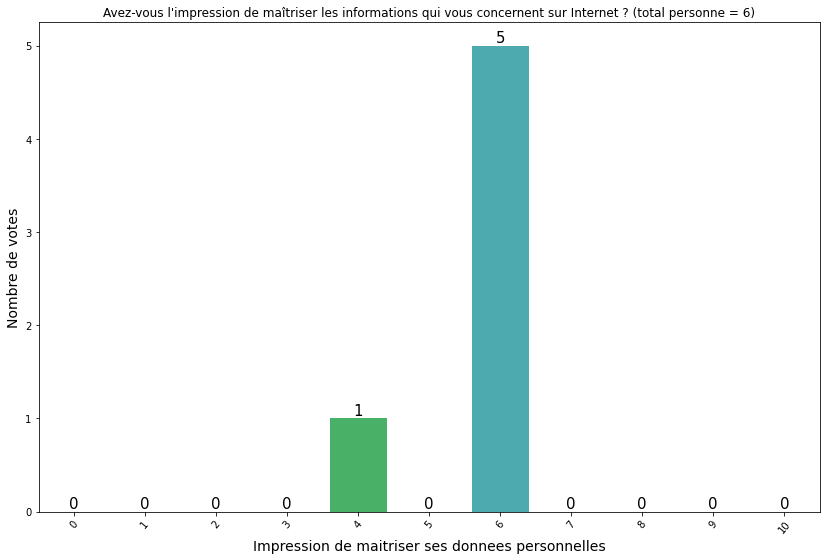

In [31]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns


nb_of_pips = []
moyenne_aisance = 0.0
total_notes = 0

for i in range(len(op_scale_c)) :
    df = form_responses[form_responses[q_confiance] == op_scale_c[i]]
    nb_votes = df.shape[0]
    nb_of_pips.append(nb_votes)
    total_notes += nb_votes*op_scale_c[i]

moyenne_aisance = total_notes / nb_responses

data = {"Note" : op_scale_c, "Votes" : nb_of_pips}

df = pd.DataFrame(data, columns=['Note', 'Votes'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Note", y="Votes", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Impression de maitriser ses donnees personnelles", size=14)
  
# Setting the label for y-axis
plt.ylabel("Nombre de votes", size=14)
  
# Setting the title for the graph
plt.title(q_confiance + " (total personne = "+str(nb_responses)+')')

plt.xticks(rotation=50)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

In [32]:
print('Moyenne generale : '+str(moyenne_aisance))

Moyenne generale : 5.666666666666667


## TODO : Plotter sur un meme graph mais de couleur differente (une par sexe)
## TODO : Plotter sur un meme graph en fonction de l'age
## TODO : Plotter sur un meme graph en fonction du metier

# Si >= 7 : Parametrez vous les cookies ? ( id = HapPLe0c3LtH ) Single choice

Si quelqu'un pense maitriser ses donnees personnelles, il doit parametrer, au moins parfois, ses outils

In [33]:
# Get labels and results
q_cookiz, cookiz_lbls, ckz_lbls_dtfs = tfs.get_results(gidx=1,qid='HapPLe0c3LtH')

# Rappel des options :
print("Rappel des temps d'informatiques possibles :\n ",cookiz_lbls)

Rappel des temps d'informatiques possibles :
  ['Oui', 'Non', 'Parfois', "Qu'est-ce qu'un cookie numérique ?"]


In [34]:
cln_cookiz_lbls, cln_ckz_values = mbr.clean_lists_for_cheesepie(labels=cookiz_lbls, values=ckz_lbls_dtfs)

nb_valid_resp = 0
for i in range(len(ckz_lbls_dtfs)) :
    nb_valid_resp += ckz_lbls_dtfs[i].shape[0]

if nb_valid_resp > 0 :
    # show plot
    fig = plt.figure(figsize =(10, 7))
    plt.pie(cln_ckz_values, labels = cln_cookiz_lbls, autopct='%1.1f%%')
    plt.title(q_cookiz + " (total = "+str(nb_valid_resp)+")")
    plt.show()
else :
    print('Nobody was confident enough to be asked')

Nobody was confident enough to be asked


# Quantite de spams / ( id = 4xciwhJq09rE ) - Opinion scale

In [35]:
qidq = '4xciwhJq09rE'
# Get labels and results
q_spams, spams_lbls, op_scale_s = tfs.get_results(gidx=1,qid=qidq)

# Rappel des options :
print("Taille de l'opinion :\n ",op_scale_s)

# form_responses = liste de toutes les reponses sous forme de dataframe

Taille de l'opinion :
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


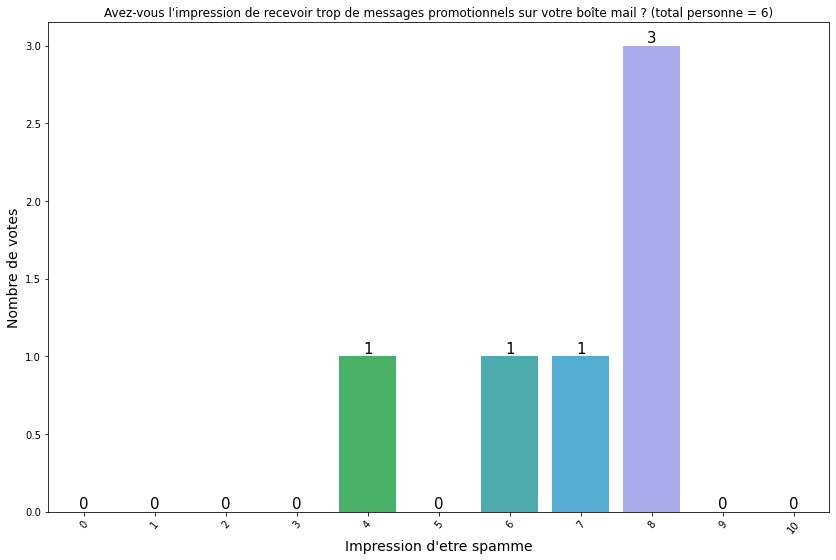

In [36]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns


nb_of_pips = []
moyenne_aisance = 0.0
total_notes = 0

for i in range(len(op_scale_s)) :
    df = form_responses[form_responses[q_spams] == op_scale_s[i]]
    nb_votes = df.shape[0]
    nb_of_pips.append(nb_votes)
    total_notes += nb_votes*op_scale_c[i]

moyenne_aisance = total_notes / nb_responses

data = {"Note" : op_scale_s, "Votes" : nb_of_pips}

df = pd.DataFrame(data, columns=['Note', 'Votes'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Note", y="Votes", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Impression d'etre spamme", size=14)
  
# Setting the label for y-axis
plt.ylabel("Nombre de votes", size=14)
  
# Setting the title for the graph
plt.title(q_spams + " (total personne = "+str(nb_responses)+')')

plt.xticks(rotation=50)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

# Gestion des mots de passe ( id = ZkMwKgLi3nvp ) - Single Choice

In [37]:
q_id = 'ZkMwKgLi3nvp'

# Get labels and results
q_gestMDP, l_gestMDP_lbl, l_gestMDP_dtfs = tfs.get_results(gidx=1,qid=q_id)

# Rappel des options :
print("Rappel des temps d'informatiques possibles :\n ",l_gestMDP_lbl)

POOOOO
Rappel des temps d'informatiques possibles :
  ['Papiers, post-it. Car eux, ils ne se font pas hacker', "Je les enregistre dans mon navigateur, comme ca je vis l'experience la plus fluide possible", "J'ai un gestionnaire de mots de passe dédié. Tout est crypté", 'Other.1']


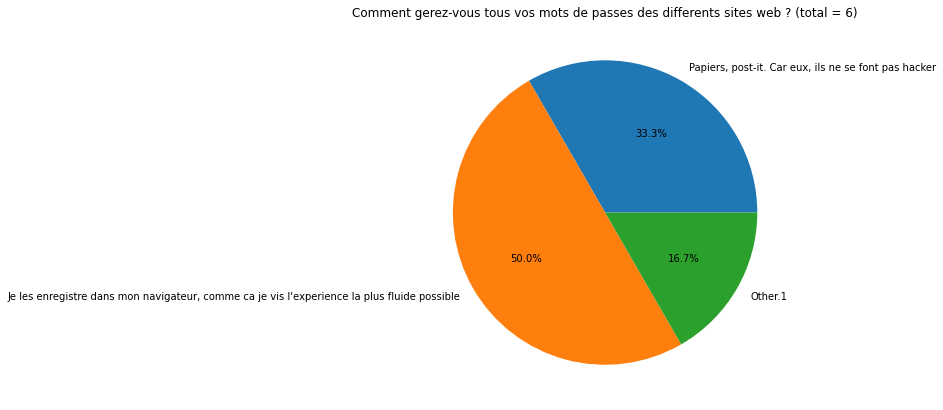

In [38]:
cln_gestMDP_lbl, cln_gestMDP_dtfs = mbr.clean_lists_for_cheesepie(labels=l_gestMDP_lbl, values=l_gestMDP_dtfs)

# Peut-etre faire une fonction pour raccourcie les labels

# nb valide reponse pour le questionnaire
nb_valid_resp = 0
for i in range(len(l_gestMDP_dtfs)) :
    nb_valid_resp += l_gestMDP_dtfs[i].shape[0]

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_gestMDP_dtfs, labels = cln_gestMDP_lbl, autopct='%1.1f%%')
plt.title(q_gestMDP + " (total = "+str(nb_valid_resp)+")")
plt.show()

# Benediction ou Malediction ? ( id = rT2VhptKefBR ) Single Choice

In [39]:
q_id = 'rT2VhptKefBR'

# Get labels and results
q_bene, l_bene_lbl, l_bene_dtfs = tfs.get_results(gidx=1,qid=q_id)

# Rappel des options :
print("Rappel des temps d'informatiques possibles :\n ",l_bene_lbl)

Rappel des temps d'informatiques possibles :
  ['Bénédiction', 'Malédiction', 'Drôle de question']


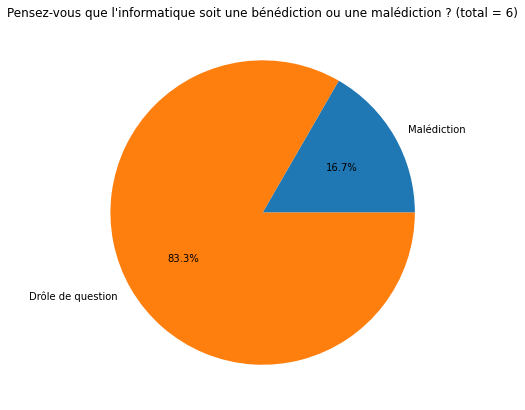

In [40]:
cln_bene_lbl, cln_bene_dtfs = mbr.clean_lists_for_cheesepie(labels=l_bene_lbl, values=l_bene_dtfs)

# Peut-etre faire une fonction pour raccourcie les labels

# nb valide reponse pour le questionnaire
nb_valid_resp = 0
for i in range(len(l_gestMDP_dtfs)) :
    nb_valid_resp += l_gestMDP_dtfs[i].shape[0]

#colors a a juster
#mecolors = ['black', 'grey']

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_bene_dtfs, labels = cln_bene_lbl, autopct='%1.1f%%') #, colors=mecolors
plt.title(q_bene + " (total = "+str(nb_valid_resp)+")")
plt.show()

--------------------------------------------------------

# GROUP 3 - ENSEIGNEMENT ET EDUCATION

--------------------------------------------------------

# Vous a-t-on enseigne l'informatique a l'ecole ? ( id = NXnMNhHW9dGK ) Single Choice

In [43]:
q_id = 'NXnMNhHW9dGK'

# Get labels and results
q_apprentissage, l_apprentissage_lbl, l_apprentissage_dtfs = tfs.get_results(gidx=2,qid=q_id)

# Rappel des options :
print("Rappel des temps d'informatiques possibles :\n ",l_apprentissage_lbl)

Rappel des temps d'informatiques possibles :
  ['oui', 'non']


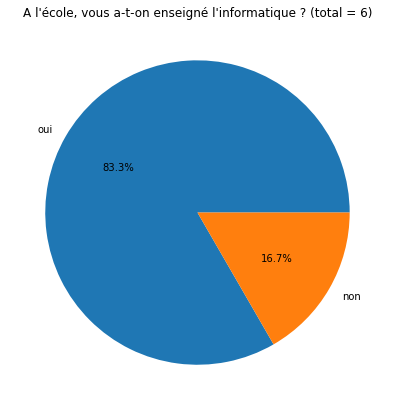

In [45]:
cln_apprentissage_lbl, cln_apprentissage_dtfs = mbr.clean_lists_for_cheesepie(labels=l_apprentissage_lbl, values=l_apprentissage_dtfs)

# Peut-etre faire une fonction pour raccourcie les labels

# nb valide reponse pour le questionnaire
nb_valid_resp = 0
for i in range(len(l_apprentissage_dtfs)) :
    nb_valid_resp += l_apprentissage_dtfs[i].shape[0]

#colors a a juster
#mecolors = ['black', 'grey']

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_apprentissage_dtfs, labels = cln_apprentissage_lbl, autopct='%1.1f%%') #, colors=mecolors
plt.title(q_apprentissage + " (total = "+str(nb_valid_resp)+")")
plt.show()

## TODO : FAIRE PAR TRANCHE D"AGE

## TODO : FAIRE PAR SEXE

# Si Oui : A quelle periode ? ( id = evUI2CmdoK14 ) - Multiple Choice

In [46]:
qidq = 'evUI2CmdoK14'
# Get labels and results
q_timetolearn, timetolearn_lbls, timetolearn_dtf = tfs.get_results(gidx=2,qid=qidq)

# Rappel des options :
print("Rappel des objets informatiques possibles :\n ",timetolearn_lbls)

I'm in
Rappel des objets informatiques possibles :
  ['École primaire', 'Collège', 'Lycée', 'Études supérieures', 'Other.2']


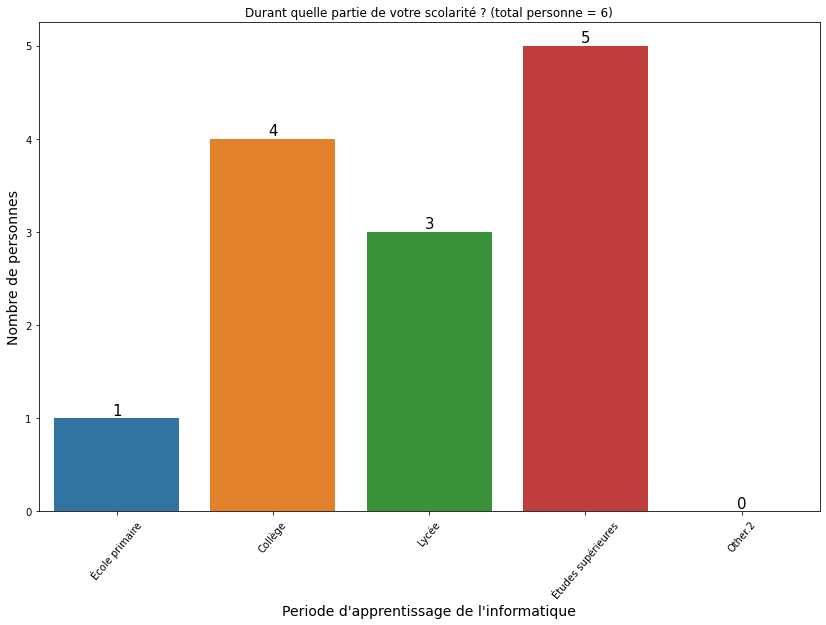

In [47]:
# Reference : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
import pandas as pd
import seaborn as sns


nb_of_pips = []
moyenne_aisance = 0.0

for i in range(len(timetolearn_lbls)) :
    nb_votes = timetolearn_dtf[i].shape[0]
    nb_of_pips.append(nb_votes)

data = {"Enseignement informatique" : timetolearn_lbls, "Nb personnes" : nb_of_pips}

df = pd.DataFrame(data, columns=['Enseignement informatique', 'Nb personnes'])

# Defining the plot size
plt.figure(figsize=(14, 9))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Enseignement informatique", y="Nb personnes", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Periode d'apprentissage de l'informatique", size=14)
  
# Setting the label for y-axis
plt.ylabel("Nombre de personnes", size=14)
  
# Setting the title for the graph
plt.title(q_timetolearn + " (total personne = "+str(nb_responses)+')')

plt.xticks(rotation=50)
# Si je fais des plots de taux, ajouter echelle de 0 a 100
# plt.ylim([0,100])
  
# Fianlly showing the plot
plt.show()

# Formation professionnelle ? ( id = hENgGmnFSnpK ) Yes/no


In [48]:
qidq = 'hENgGmnFSnpK'
# Get labels and results
q_formpro, formpro_lbls, formpro_dtf = tfs.get_results(gidx=2,qid=qidq)

# Rappel des options :
print("Rappel des objets informatiques possibles :\n ",formpro_lbls)

Rappel des objets informatiques possibles :
  ['oui', 'non']


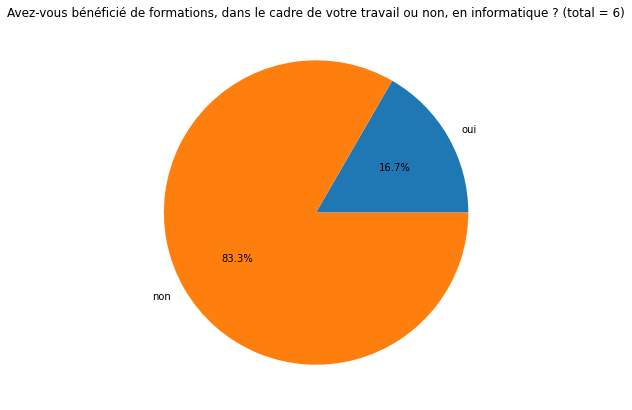

In [49]:
cln_formpro_lbl, cln_formpro_dtfs = mbr.clean_lists_for_cheesepie(labels=formpro_lbls, values=formpro_dtf)

# Peut-etre faire une fonction pour raccourcie les labels

# nb valide reponse pour le questionnaire
nb_valid_resp = 0
for i in range(len(formpro_dtf)) :
    nb_valid_resp += formpro_dtf[i].shape[0]

#colors a a juster
#mecolors = ['black', 'grey']

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_formpro_dtfs, labels = cln_formpro_lbl, autopct='%1.1f%%') #, colors=mecolors
plt.title(q_formpro + " (total = "+str(nb_valid_resp)+")")
plt.show()

# Saver-vous ecrire en binaire ? ( id = TtSJ6Qnx4pQF ) Yes/No

In [50]:
qidq = 'TtSJ6Qnx4pQF'
# Get labels and results
q_knobinary, knobinary_lbls, knobinary_dtf = tfs.get_results(gidx=2,qid=qidq)

# Rappel des options :
print("Rappel des objets informatiques possibles :\n ",knobinary_lbls)

Rappel des objets informatiques possibles :
  ['oui', 'non']


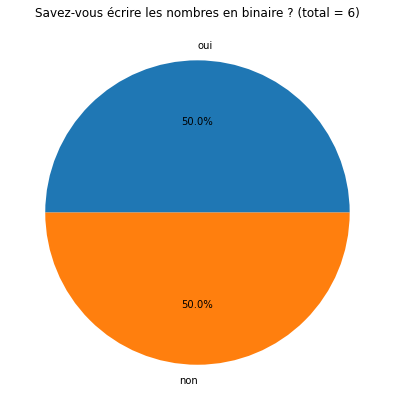

In [52]:
cln_knobinary_lbl, cln_knobinary_dtfs = mbr.clean_lists_for_cheesepie(labels=knobinary_lbls, values=knobinary_dtf)

# Peut-etre faire une fonction pour raccourcie les labels

# nb valide reponse pour le questionnaire
nb_valid_resp = 0
for i in range(len(knobinary_dtf)) :
    nb_valid_resp += knobinary_dtf[i].shape[0]



#colors a a juster
#mecolors = ['black', 'grey']

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_knobinary_dtfs, labels = cln_knobinary_lbl, autopct='%1.1f%%') #, colors=mecolors
plt.title(q_knobinary + " (total = "+str(nb_valid_resp)+")")
plt.show()

# Si oui : Test de binaire ( 0101 ? id = 50aXmk8eOhtZ ) - Champ nombre

In [59]:
qidq = '50aXmk8eOhtZ'
resultatattendu = 5

nom_question = tfs.get_q_title(gidx=2,qid=qidq)
print(nom_question)
nb_sachant_binaire = knobinary_dtf[0].shape[0]
print('total personnes interrogees : ' + str(nb_sachant_binaire) )
dtf_des_vrais_binaires_mans = knobinary_dtf[0][knobinary_dtf[0][nom_question] == resultatattendu]
print ('Resultat attendu : '+str(resultatattendu))
nb_vrais_binaire_man = dtf_des_vrais_binaires_mans.shape[0]
print ('Nombre de vrais binaires mans : '+ str(nb_vrais_binaire_man))

Et bien prouvez le ! Que vaut 0101 ?
total personnes interrogees : 3
Resultat attendu : 5
Nombre de vrais binaires mans : 2


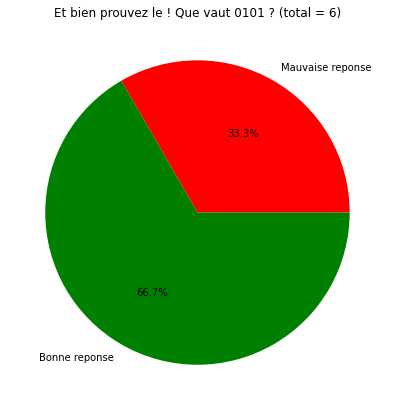

In [61]:
labels = ['Mauvaise reponse', 'Bonne reponse']
values = [nb_sachant_binaire - nb_vrais_binaire_man, nb_vrais_binaire_man]
#colors a a juster
mecolors = ['red', 'green']

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(values, labels = labels, autopct='%1.1f%%', colors=mecolors) #, colors=mecolors
plt.title(nom_question + " (total = "+str(nb_valid_resp)+")")
plt.show()

# Si non : Interesse pour apprendre ? ( id = Sj58NG9HjORn ) - Yes/No

In [63]:
qidq = 'Sj58NG9HjORn'
# On aimerait bien que les gens soient interesses pour apprendre
resultatattendu = 1

nom_question = tfs.get_q_title(gidx=2,qid=qidq)

print(nom_question)
nb_non_sachant_binaire = knobinary_dtf[1].shape[0]
print('total personnes interrogees : ' + str(nb_non_sachant_binaire) )
dtf_interetbinaire_mans = knobinary_dtf[1][knobinary_dtf[1][nom_question] == resultatattendu]
print ('Resultat attendu : '+str(resultatattendu))
nb_interesses = dtf_interetbinaire_mans.shape[0]
print ('Nombre de vrais binaires mans : '+ str(nb_interesses))

Si je vous disais que je peux vous l'enseigner en une demi-heure, seriez-vous intéressés pour l'apprendre ?
total personnes interrogees : 3
Resultat attendu : 1
Nombre de vrais binaires mans : 1


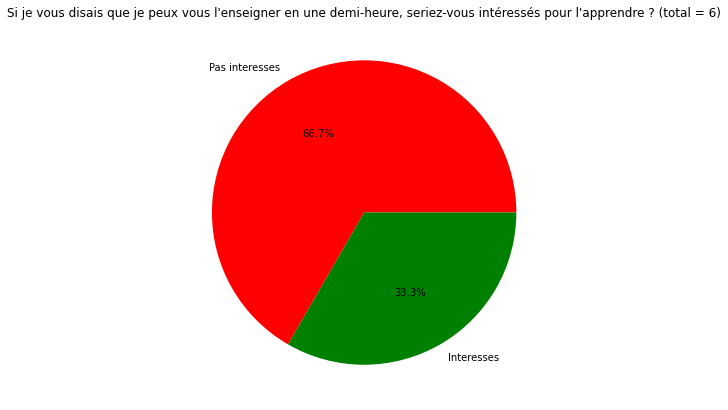

In [65]:
labels = ['Pas interesses', 'Interesses']
values = [nb_non_sachant_binaire - nb_interesses, nb_interesses]
#colors a a juster
mecolors = ['red', 'green']

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(values, labels = labels, autopct='%1.1f%%', colors=mecolors) #, colors=mecolors
plt.title(nom_question + " (total = "+str(nb_valid_resp)+")")
plt.show()

# Seriez-vous pret a payer ? ( id = FrOxlYq8Jwsu ) - Yes/No

In [ ]:
qidq = 'FrOxlYq8Jwsu'
# On aimerait bien que les gens soient interesses pour apprendre
resultatattendu = 1

nom_question = tfs.get_q_title(gidx=2,qid=qidq)

print(nom_question)
nb_non_sachant_binaire = knobinary_dtf[1].shape[0]
print('total personnes interrogees : ' + str(nb_non_sachant_binaire) )


# recuperer les sous DTF d'un DTF


# dtf_interetbinaire_mans = knobinary_dtf[1][knobinary_dtf[1][nom_question] == resultatattendu]
# print ('Resultat attendu : '+str(resultatattendu))
# nb_interesses = dtf_interetbinaire_mans.shape[0]
# print ('Nombre de vrais binaires mans : '+ str(nb_interesses))